In [1]:
import os

In [2]:
os.chdir("/content/drive/MyDrive/5_AIADVANCE/NN-Without-Frameworks/nn_without_frameworks/")

In [ ]:
# !git clone https://github.com/alirezakazemipour/NN-Without-Frameworks.git

In [ ]:
# !python ./nn_without_frameworks/train.py

-----numpy_nn: Regression-----

Model Summary:
+--------------+----------------+----------+
| Layer        | Output shape   |   Param# |
+==============+================+==========+
| Input        | (-1, 1)        |        0 |
+--------------+----------------+----------+
| Dense[0]     | (-1, 100)      |      200 |
+--------------+----------------+----------+
| LayerNorm[1] | (-1, 100)      |      200 |
+--------------+----------------+----------+
| Dropout[2]   | (-1, 100)      |        0 |
+--------------+----------------+----------+
| Dense[3]     | (-1, 1)        |      101 |
+--------------+----------------+----------+
total trainable parameters: 501

dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
Step: 0 | loss: 1.34678
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
de

<ipython-input-3-33dfae6b8af1>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Step: %i | loss: %.5f" % (step, smoothed_loss))


Streaming output truncated to the last 5000 lines.
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100, 1)
(100, 1)
(100, 1)
dense
dropout
dense
3
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(100

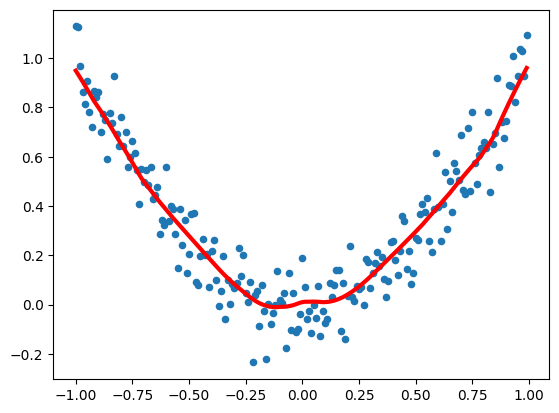

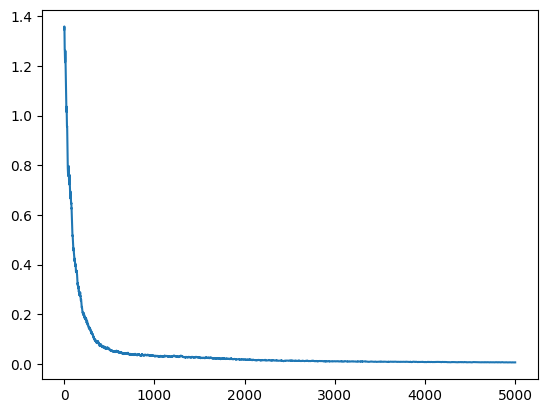

-----numpy_nn: Classification-----
(2, 100)
(2, 2)
(2, 100)
(2, 2)

Model Summary:
+-----------+----------------+----------+
| Layer     | Output shape   |   Param# |
+===========+================+==========+
| Input     | (-1, 2, 2)     |        0 |
+-----------+----------------+----------+
| LSTM[0]   | (-1, 100)      |    41200 |
+-----------+----------------+----------+
| Conv1d[1] | (-1, 3, 100)   |    20100 |
+-----------+----------------+----------+
| Pool1d[2] | (-1, 2, 100)   |        0 |
+-----------+----------------+----------+
| Dense[3]  | (-1, 1)        |      201 |
+-----------+----------------+----------+
total trainable parameters: 61501



In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np

import numpy_nn as nn


# region train_regression
def train_regression(nn):
    print(f"-----{nn.__name__}: Regression-----")

    class MyNet(nn.Module):
        def __init__(self, input_dim, out_dim):
            super().__init__()
            self.input_dim = input_dim
            self.out_dim = out_dim
            self.hidden = nn.layers.Dense(in_features=self.input_dim,
                                          out_features=100,
                                          activation=nn.acts.ReLU(),
                                          weight_initializer=nn.inits.HeNormal(nn.acts.ReLU()),
                                          bias_initializer=nn.inits.Constant(0.),
                                          regularizer_type="l2",
                                          lam=1e-3
                                          )
            self.bn = nn.layers.LayerNorm(100)
            self.dropout = nn.layers.Dropout()
            self.output = nn.layers.Dense(in_features=100,
                                          out_features=self.out_dim,
                                          weight_initializer=nn.inits.XavierUniform(),
                                          bias_initializer=nn.inits.Constant(0.),
                                          regularizer_type="l2",
                                          lam=1e-3
                                          )

        def forward(self, x, eval=False):
            x = self.hidden(x)
            x = self.bn(x, eval)
            x = self.dropout(x, eval)
            return self.output(x)

    np.random.seed(1)
    random.seed(1)
    x = [[0.01 * i] for i in range(-100, 100)]
    t = [[k[0] ** 2 + random.gauss(0, 1) * 0.1] for k in x]
    epoch = 5000
    batch_size = 64

    my_net = MyNet(1, 1)
    # my_net = nn.Sequential(nn.layers.Dense(in_features=1,
    #                                        out_features=200,
    #                                        activation=nn.acts.ReLU(),
    #                                        weight_initializer=nn.inits.HeNormal(nn.acts.ReLU()),
    #                                        bias_initializer=nn.inits.Constant(0.),
    #                                        regularizer_type="l2",
    #                                        lam=1e-3
    #                                        ),
    #                        nn.layers.LayerNorm(200),
    #                        nn.layers.Dropout(),
    #                        nn.layers.Dense(in_features=200,
    #                                        out_features=1,
    #                                        weight_initializer=nn.inits.XavierUniform(),
    #                                        bias_initializer=nn.inits.Constant(0.),
    #                                        regularizer_type="l2",
    #                                        lam=1e-3
    #                                        )
    #                        )
    my_net.build(np.ones((100, 1)))
    my_net.summary()
    # return
    mse = nn.losses.MSE()
    opt = nn.optims.Adam(my_net.parameters)
    loss_history = []
    smoothed_loss = 0
    for step in range(epoch):
        batch, target = [[None] for _ in range(batch_size)], [[None] for _ in range(batch_size)]
        for i in range(batch_size):
            idx = random.randint(0, len(x) - 1)
            batch[i] = x[idx]
            target[i] = t[idx]
        y = my_net(batch)
        loss = mse(y, target)
        my_net.backward(loss)
        opt.apply()
        if step == 0:
            smoothed_loss = loss.value
        else:
            smoothed_loss = 0.9 * smoothed_loss + 0.1 * loss.value
        loss_history.append(smoothed_loss)
        if step % 100 == 0:
            print("Step: %i | loss: %.5f" % (step, smoothed_loss))

    plt.scatter(x, t, s=20)
    y = my_net.forward(x, eval=True)
    plt.plot(x, y, c="red", lw=3)
    plt.show()
    plt.plot(np.arange(len(loss_history)), loss_history)
    plt.show()


# endregion


def train_classification(nn):  # noqa
    print(f"-----{nn.__name__}: Classification-----")

    class MyNet(nn.Module):
        def __init__(self, input_dim, out_dim):
            super().__init__()
            self.input_dim = input_dim
            self.out_dim = out_dim
            # self.conv1 = nn.layers.Conv1d(in_features=2,
            #                               out_features=100,
            #                               kernel_size=2,
            #                               stride=1,
            #                               padding=1,
            #                               activation=nn.acts.ReLU(),
            #                               weight_initializer=nn.inits.XavierUniform(),
            #                               bias_initializer=nn.inits.Constant(0.1),
            #                               )
            self.lstm = nn.layers.LSTM(in_features=2,
                                       hidden_size=100,
                                       weight_initializer=nn.inits.XavierUniform(),
                                       bias_initializer=nn.inits.Constant(0.1),
                                       )
            self.conv2 = nn.layers.Conv1d(in_features=100,
                                          out_features=100,
                                          kernel_size=2,
                                          stride=1,
                                          padding=1,
                                          activation=nn.acts.ReLU(),
                                          weight_initializer=nn.inits.XavierUniform(),
                                          bias_initializer=nn.inits.Constant(0.1),
                                          )
            self.maxpool = nn.layers.Pool1d(mode="avg",
                                            kernel_size=2,
                                            stride=2,
                                            padding=1,
                                            )

            self.out = nn.layers.Dense(in_features=200,
                                       out_features=1,
                                       activation=nn.acts.Sigmoid(),
                                       weight_initializer=nn.inits.HeNormal(nn.acts.ReLU())
                                       )

        def forward(self, x, eval=False):
            # print(x)
            x, h, c = x[0], x[1], x[2]
            x = np.asarray(x)
            x = x.reshape((-1, 2, 2))
            # print(self.lstm(x, h, c))
            x, h, c = self.lstm(x, h, c)
            x = self.conv2(x)
            x = self.maxpool(x, eval)
            x = x.reshape(x.shape[0], -1)
            x = self.out(x)
            return x

    np.random.seed(123)
    random.seed(123)

    num_samples = 100  # number of points per class
    num_features = 4
    num_classes = 2  # number of classes

    epoch = 500
    batch_size = 64

    x = [[0 for _ in range(num_features)] for _ in range(num_classes * num_samples)]
    t = [[0] for _ in range(num_classes * num_samples)]

    r = [i / num_samples for i in range(num_samples)]
    for j in range(num_classes):
        theta = [i * 0.04 + j * 4 + random.gauss(0, 0.2) for i in range(num_samples)]
        for idx, radius, angle in zip(range(num_samples * j, num_samples * (j + 1)), r, theta):
            x[idx][0] = radius * np.sin(angle)
            x[idx][1] = radius * np.cos(angle)
            t[idx][0] = j

    my_net = MyNet(num_features, 1)
    my_net.build([np.ones((2, num_features)),
                  np.zeros((2, 100)),
                  np.zeros((2, 100))]
                 )
    my_net.summary()
    return
    ce_loss = nn.losses.BinaryFocal(gamma=0)
    opt = nn.optims.SGD(my_net.parameters, lr=1.)
    loss_history = []
    smoothed_loss = 0
    for step in range(epoch):
        batch, target = [[None] for _ in range(batch_size)], [[None] for _ in range(batch_size)]
        for i in range(batch_size):
            idx = random.randint(0, len(x) - 1)
            batch[i] = x[idx]
            target[i] = t[idx]
        y = my_net(batch, False)
        y = y.squeeze(-1)
        target = np.asarray(target).squeeze(-1)
        loss = ce_loss(y, target)
        if nn.__name__ == "pure_nn":
            tot_loss = loss.value + \
                       0.5 * my_net.hidden.lam * np.sum(
                nn.utils.element_wise_mul(my_net.hidden.vars["W"], my_net.hidden.vars["W"])) + \
                       0.5 * my_net.output.lam * np.sum(
                nn.utils.element_wise_mul(my_net.output.vars["W"], my_net.output.vars["W"]))
        else:
            tot_loss = loss.value  # + \
            # 0.5 * my_net.hidden.lam * np.sum(my_net.hidden.vars["W"] ** 2) + \
            # 0.5 * my_net.output.lam * np.sum(my_net.output.vars["W"] ** 2)
        if step == 0:
            smoothed_loss = tot_loss
        else:
            smoothed_loss = 0.99 * smoothed_loss + 0.01 * tot_loss
        loss_history.append(smoothed_loss)
        my_net.backward(loss)
        opt.apply()
        if step % 100 == 0:
            print("Step: %i | loss: %.5f" % (step, smoothed_loss))

    nn.save(my_net.parameters, "weights.pkl")
    weights = nn.load("weights.pkl")
    my_net.set_weights(weights)
    y = my_net.forward((x), True)
    predicted_class = np.where(y > 0.5, 1, 0)  # np.argmax(y, axis=1)
    print('training accuracy: %.2f' % (np.mean(predicted_class == np.array(t))))
    plt.plot(np.arange(len(loss_history)), loss_history)
    plt.figure()
    plt.subplot(121)
    plt.title("predicted classes")
    plt.scatter(np.array(x)[:, 0], np.array(x)[:, 1], c=np.array(predicted_class), s=40, cmap=plt.cm.Spectral)
    plt.subplot(122)
    plt.title("real classes")
    plt.scatter(np.array(x)[:, 0], np.array(x)[:, 1], c=np.array(t), s=40, cmap=plt.cm.Spectral)
    plt.show()


if __name__ == "__main__":
    nn.seed(123)

    train_regression(nn)
    train_classification(nn)

    # import pure_nn as nn
    # train_regression(nn)
    # train_classification(nn)
